# Summary Statistics

Summary statistics are values calculated from sample data that measure some characteristic about the data. Most people use the **average** of the data as a the standard summary statistic; for instance, when receiving their exam scores, students will usually ask what the class average was for the exam. The average is also the most commonly used summary statistic by data scientists; however most statisticians use the term **sample mean** for this statistic.

The **average** of the data is t

or **sample mean**. I **strongly** prefer the word average for the statistic computed from a set of data. 

We will use the word **mean** to refer to a type of average for random phenomena, when we do not have specific samples for those values. 

* What does the **average** or **sample mean** mean?

    1. The value where most of the data "sits" is centered around
    
    2. The value that has minimum distance from every value
    
    3. Value most likely to occur
    
    4. Value that divides group into 2 sets of equal size 

Both Pandas and Numpy provide methods to calculate the average:


In [85]:
import numpy as np
import pandas as pd
df=pd.read_csv(
 "http://wireless.ece.ufl.edu/jshea/idse/data/firearms-combined.csv")
rate2005=np.array(df["RATE-2005"])
rate2014=np.array(df["RATE-2014"])

In [11]:
df["RATE-2005"].mean()

10.81

In [12]:
df["RATE-2014"].mean()

11.440000000000003

In [13]:
rate2005.mean()

10.809999999999997

In [14]:
np.mean(rate2014)

11.44

The sample mean of the 2014 data set is larger than that for the 2005 data set. This may indicate that the overturn of the assault weapon ban in 2014 is associated with an increase in firearms mortality.

However, the difference is relatively small, as are the sample sizes (50).

In [15]:
diff=rate2014.mean()-rate2005.mean()
diff

0.6300000000000026

**How could we conduct an experiment to determine if this difference might be caused by sampling?**

* The *null hypothesis* is that there is no real difference between the two data sets, and any differences are just based on random sampling from the underlying population.

So, let's assume that the two samples are from the same population. 

* By combining (called **pooling**) the samples, we get a new subset of the original population, if the null hypothesis is true. Morever, any sample from this better represents the original population than either of the samples.

* We can check whether the null hypothesis is true by checking how often samples from the pooled data set have a difference in means as large as the one observed.

**The big question:** To sample **with replacement** or **without replacement**?

1. *Sampling with replacement* is called **bootstrapping** and is the most popular resampling technique. It is meant to better emulate independent sampling from the original population.

2. *Sampling without replacement* better emulates **permutation** tests, where we check every possible reordering of the data into samples. This will be discussed more later.

    * Generally, *sampling without replacement* is more conservative (produces a higher $p$-value) than bootstrapping. 
    * Bootstraping is **easy** and **most popular**, and we apply it here:

**The Bootstrap Idea:** The original sample approximates the population from which it was drawn. So resamples from this sample approximate what we would get if we took many samples from the population. The bootstrap distribution of a statistic, based on many resamples, approximates the sampling distribution of the statistic, based on many samples.

### Bootstrap Model 1

In [16]:
import random

In [17]:
pooled=np.concatenate((rate2005,rate2014))

In [18]:
print(pooled,pooled.size)

[16.  17.5 16.1 15.7  9.5 11.6  5.3  8.8 10.  12.1  2.1 14.1  8.  11.2
  6.7  9.3 13.  18.5  7.8 11.9  3.4 10.8  7.  16.  12.9 16.9  7.7 16.1
  6.6  5.2 13.9  5.3 12.8  8.8  9.6 13.2 10.7 10.8  3.6 13.8 10.2 16.
 11.1 10.1  6.8 11.5  8.8 13.8  8.5 13.4 16.9 19.2 13.5 16.6  7.4 12.2
  5.  11.1 11.5 13.7  2.6 13.2  9.  12.4  7.5 11.3 13.9 19.   9.4  9.
  3.2 11.1  6.6 18.3 15.3 16.1  9.5 14.8  8.7  5.3 16.   4.2 11.8 12.3
 10.3 15.7 11.7 10.5  3.  15.5 10.3 15.1 10.7 12.3 10.3 10.3  9.7 14.6
  8.2 16.2] 100


How would we randomly choose from this data **with replacement**?

In [19]:
print(random.choices(pooled,k=50))

[9.3, 8.8, 7.0, 2.1, 11.3, 9.4, 3.0, 13.2, 13.8, 16.1, 9.4, 15.5, 8.7, 10.3, 11.1, 13.9, 9.5, 7.0, 12.2, 8.5, 15.7, 11.7, 11.1, 12.9, 11.9, 16.2, 13.9, 10.8, 8.2, 9.6, 9.4, 12.8, 13.2, 15.7, 12.4, 6.8, 9.5, 9.5, 10.5, 9.0, 15.5, 12.1, 10.3, 8.8, 16.0, 16.9, 18.3, 12.4, 12.3, 11.2]


```numpy.random``` has a similar method:

In [20]:
import numpy.random as npr

In [21]:
npr.choice(pooled,size=50)

array([ 7.8,  3.2,  5.3, 10.1, 10.3, 10.8,  3.2, 11.7,  9. , 11.1,  2.6,
       11.6,  9.7,  5.3,  4.2, 15.3, 16.1,  5. , 11.3, 13. , 10.1, 12.8,
       11.1, 11.8,  3.6, 16. , 11.8,  4.2, 13.9, 12.4, 18.5,  6.6, 16.1,
       14.8, 16.9, 16.9, 12.9, 14.6, 12.4,  8.5, 13.4, 10.2,  6.6, 13.9,
       10.5,  7.4, 11.1,  7.8, 16. , 17.5])

In [22]:
num_sims=1000
event_count=0
for sim in range(num_sims):
    sample05=npr.choice(pooled,size=50)
    sample14=npr.choice(pooled,size=50)
    mean05=sample05.mean()
    mean14=sample14.mean()
    sample_diff=mean14-mean05
    if abs(sample_diff)>=diff:
        event_count+=1

print("Under null hypothesis, observe effect this large with prob. ",event_count/num_sims)

Under null hypothesis, observe effect this large with prob.  0.457


* What is the conclusion?

<!-- The data does not support that the observed effect is statistically significant, so we can't reject the null hypothesis. -->

* What are some problems with this approach?

<!-- We treated all the states in the two samples as if they were independent -- but they are measurements on the same states! That violates our assumptions. 

The states have their own firearms mortality behavior based on other factors (rural/urban, education level, laws, etc.) -->

### Bootstrap Model 2

A more reasonable bootstrap approach would be to randomly assign values from 2005 or 2014 for each state and then assess the difference:

In [23]:
stacked_data=np.vstack((rate2005,rate2014))

In [24]:
print(stacked_data,stacked_data.shape)

[[16.  17.5 16.1 15.7  9.5 11.6  5.3  8.8 10.  12.1  2.1 14.1  8.  11.2
   6.7  9.3 13.  18.5  7.8 11.9  3.4 10.8  7.  16.  12.9 16.9  7.7 16.1
   6.6  5.2 13.9  5.3 12.8  8.8  9.6 13.2 10.7 10.8  3.6 13.8 10.2 16.
  11.1 10.1  6.8 11.5  8.8 13.8  8.5 13.4]
 [16.9 19.2 13.5 16.6  7.4 12.2  5.  11.1 11.5 13.7  2.6 13.2  9.  12.4
   7.5 11.3 13.9 19.   9.4  9.   3.2 11.1  6.6 18.3 15.3 16.1  9.5 14.8
   8.7  5.3 16.   4.2 11.8 12.3 10.3 15.7 11.7 10.5  3.  15.5 10.3 15.1
  10.7 12.3 10.3 10.3  9.7 14.6  8.2 16.2]] (2, 50)


In [25]:
num_sims=10000
event_count=0
for sim in range(num_sims):
    sample05=stacked_data[npr.randint(2,size=50),range(50)] #2-D fancy indexing!
    sample14=stacked_data[npr.randint(2,size=50),range(50)]
    mean05=sample05.mean()
    mean14=sample14.mean()
    #print(mean05,mean14)
    sample_diff=mean14-mean05
    if abs(sample_diff)>=diff:
        event_count+=1

print("Under null hypothesis, observe effect this large with prob. ",event_count/num_sims)

Under null hypothesis, observe effect this large with prob.  0.0001


* **What is the conclusion?**

<!-- It depends on how you interpret the data!

This simulation supports rejecting the null hypothesis. Under this interpretation, the restriction on assault weapons is associated with an increase in mean firearms morality. -->

## Distribution of the bootstrap mean-difference

Every time we create a bootstrap value for the difference of means, we create a new random value. Let's see how the bootstrap means are distributed by looking at a histogram of those values:

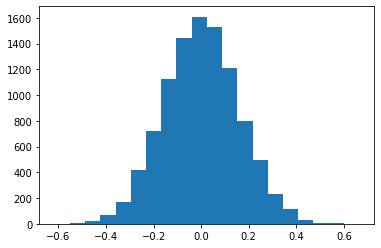

In [26]:
num_sims=10000
event_count=0
bs_stats=[]
for sim in range(num_sims):
    sample05=stacked_data[npr.randint(2,size=50),range(50)] #2-D fancy indexing!
    sample14=stacked_data[npr.randint(2,size=50),range(50)]
    mean05=sample05.mean()
    mean14=sample14.mean()
    #print(mean05,mean14)
    sample_diff=mean14-mean05
    bs_stats+=[sample_diff]

plt.hist(bs_stats,bins=20);

A few obervations:
    
1. The difference of means has a bell shape -- we saw that before. Why do you think that is?
2. Almost all of the values fall between -0.5 and +0.5. Thus, it is not surprising that getting a mean-difference as large as 0.6 is very rare.

# Effect of State Laws

The column "Total Laws 2014" shows the total number of gun laws in each state as of 2014. The data is from 

https://www.statefirearmlaws.org/resources

Now we have 2 data sources that are both in 2014, but they do not represent two samples from the same population. Instead, they represent two things that may depend on each other.

In [ ]:
df

Again, the first thing to do is plot the data. When we have two sets of data that may be dependent, a scatter plot is usually the first tool to reach for:

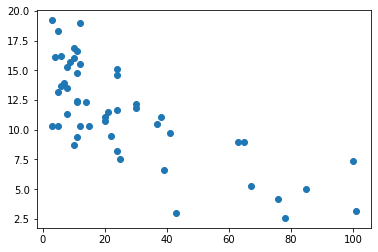

In [27]:
plt.scatter(df["Total Laws 2014"],df["RATE-2014"]);

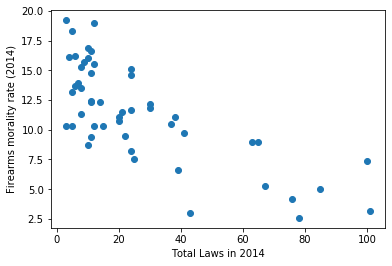

In [28]:
plt.scatter(df["Total Laws 2014"],df["RATE-2014"])
plt.xlabel("Total Laws in 2014")
plt.ylabel("Firearms morality rate (2014)");

* What does this data suggest?

<!-- An increase in the number of gun laws seems to be associated with a decrease in homicide rates. -->

* We don't know how to measure the dependence between two data sets like this -- **yet**

Let's see if we can turn this into into two data sets:

* In fact, the data *seems* to fall into two clusters, one with < 50 laws and one with > 50 laws. 

Finding clusterings of data is a job computers are good at.

Let's use a standard **clustering algorithm** to see what it find.

<div class="alert alert-success">
    <b>Clustering</b>
    
Clustering is a (non-parametric) machine learning algorithm that involves the task of grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in other groups. For example, we can use distance as a measure of similarity.
</div>

## K-means Clustering

The **$K$-Means Clustering Algorithm** is a randomized, iterative algorithm to cluster data.

The goal of $K$-Means clustering is to find $K$ clusters (or groups). The K-Means Algorithm Steps are:

1. **Initialization**: Randomly pick some points in the data set to represent the initial "centroids" (for all $K$ groups you may consider).

Iterate:
2. **Assignment** of data points to clusters: Calculate the (Euclidean) distances between all the data points and the centroids. Assign each data sample as belonging to the cluster (centroid) to which it is closest to.

If the assignments do not change, then stop. If not:

3. **Centroids Update**: Calculate the new centroids for each cluster based on the updated assignments.

4. Return to step 2.

We could code this by hand, but there are several libraries that contain clustering algorithms. 

![scikit-learn logo](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

The ```scikit-learn``` library has many useful methods for machine learning, including clustering.

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=2) # create a k-means model

In [31]:
law_data=np.vstack((df["Total Laws 2014"],df["RATE-2014"]))
law_data=law_data.T #transpose

In [32]:
kmeans.fit(law_data) # train the model using the data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
clusters = kmeans.predict(law_data) #predict the clusters for the data
# the trained model now can be used to predict the clusters for other data, too

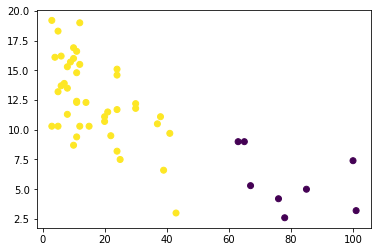

In [34]:
plt.scatter(law_data[:,0],law_data[:,1],c=clusters);

In [35]:
kmeans.cluster_centers_

array([[79.375     ,  5.7125    ],
       [16.4047619 , 12.53095238]])

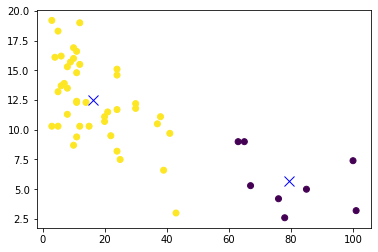

In [36]:
plt.scatter(law_data[:,0],law_data[:,1],c=clusters)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'xb',markersize=10);

We will put details of the $K$-means algorithm in our Canvas page.

Now let's partition the data accordingly:

In [37]:
less50=df[df['Total Laws 2014']<50]["RATE-2014"]

less50.mean(),len(less50)

(12.530952380952382, 42)

**Note that less50 is a pandas series object. It also has a mean method, as well as other useful summary statistics**.

In [38]:
more50=df[df['Total Laws 2014']>=50]["RATE-2014"]

more50.mean(),len(more50)

(5.7125, 8)

In [39]:
law_diff=less50.mean()-more50.mean()
law_diff

6.818452380952381

Again, if we want to perform a binary hypothesis test, we need to pool the data and draw representative samples from it:

In [40]:
all_laws=list(df['RATE-2014'])

In [41]:
num_sims=100000
event_count=0
for sim in range(num_sims):
    sample_less50=npr.choice(all_laws,size=42)
    sample_more50=npr.choice(all_laws,size=8)
    sample_diff=sample_less50.mean()-sample_more50.mean()
    if abs(sample_diff)>=law_diff:
        event_count+=1

print("Under null hypothesis, observe effect this large with prob. ",event_count/num_sims)

Under null hypothesis, observe effect this large with prob.  1e-05


* What is your conclusion?

<!-- There is an association between the number of gun laws and the firearms mortality rate. More gun laws are associated with lower firearms mortality rates. -->

* What are some issues with this analysis?

The number of gun laws passed by a state may depend on factors that also affect firearms mortality, such as
1. rural or urban
2. education levels
3. poverty levels

We can say that having more gun laws is **associated** with lower firearms mortality, but we cannot say that it **causes** lower firearm mortality.

A more careful statistical analysis would have to **control** for these other variables when measuring the effects of gun laws on firearms mortality.

# Reading Assignment

* [Exploring Histograms](https://tinlizzie.org/histograms/)

* Section ["In Depth: k-Means Clustering"](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) from "Python Data Science Handbook" textbook